In [1]:
!git clone https://github.com/SchoolofAI-Vancouver/learn_image_classification_2.git

Cloning into 'learn_image_classification_2'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 175 (delta 2), reused 169 (delta 1), pack-reused 0
Receiving objects: 100% (175/175), 3.48 MiB | 31.54 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [12]:
# see the content of the currend directory (cd)
!ls
# change current direcory to the root folder of the repo
%cd learn_image_classification_2/
# verify that we are in the repo
!ls

learn_image_classification_2  sample_data
/content/learn_image_classification_2
data  LICENSE  README.md


In [1]:
# import
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [2]:
# Go to Edit -> Notebook Settings to enable a GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13550280575826895353
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281927373
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11318527752442748591
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
!mkdir data/transform_samples

In [0]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/cat/cat.2.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='data/transform_samples', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 3:
        break  # otherwise the generator would loop indefinitely

In [71]:
!ls data/transform_samples/

cat_0_1121.jpeg  cat_0_5464.jpeg  cat_0_5771.jpeg  cat_0_9458.jpeg


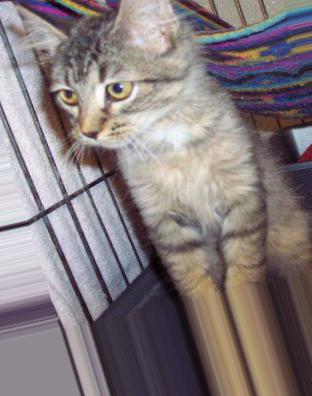

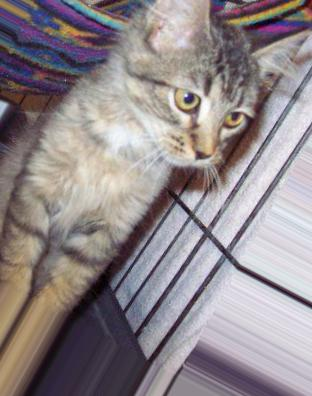

In [72]:
from IPython.display import Image, display
display(Image('data/transform_samples/cat_0_1121.jpeg'))
display(Image('data/transform_samples/cat_0_5771.jpeg'))

In [0]:
!rm -rf data/transform_samples

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(164, 164, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [64]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(164, 164),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(164, 164),
        batch_size=batch_size,
        class_mode='binary')

Found 150 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [66]:
model.fit_generator(
        train_generator,
        steps_per_epoch=1000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=400 // batch_size)

Epoch 1/10
62/62 [==============================] - 48s 768ms/step - loss: 0.2006 - acc: 0.9214
Epoch 2/10
62/62 [==============================] - 47s 754ms/step - loss: 0.1609 - acc: 0.9334
Epoch 3/10
62/62 [==============================] - 47s 762ms/step - loss: 0.1821 - acc: 0.9338
Epoch 4/10
62/62 [==============================] - 47s 757ms/step - loss: 0.1022 - acc: 0.9617
Epoch 5/10
62/62 [==============================] - 47s 760ms/step - loss: 0.0996 - acc: 0.9701
Epoch 6/10
62/62 [==============================] - 47s 765ms/step - loss: 0.1389 - acc: 0.9694
Epoch 7/10
62/62 [==============================] - 47s 757ms/step - loss: 0.0690 - acc: 0.9749
Epoch 8/10
62/62 [==============================] - 47s 750ms/step - loss: 0.0694 - acc: 0.9778
Epoch 9/10
62/62 [==============================] - 47s 757ms/step - loss: 0.0826 - acc: 0.9717
Epoch 10/10
62/62 [==============================] - 47s 766ms/step - loss: 0.0707 - acc: 0.9758
